# EXPERIMENT - 2

### IMPORTING IMPORTANT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

/tmp/ipykernel_23370/3234525173.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/raw/train.csv')


In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df_train = train_data.drop('type', axis=1)
df_test = test_data.drop('type', axis=1)

### DATA CLEANING
1. Heights had been converted to date initially. Therefore, it was mapped and converted to centimeters resulting in a numerical feature
1. The number of players had noise, which was removed and replaced with 1 as number 1 had the highest usage.
1. Values in years had many unclear values which were removed and replaced with 'Jr' as it had highest mode which is used for imputing categorical values.
1. Conference name seems to have upper and lower case difference. Converting all to uppercase before encoding as a feature.

In [5]:
# Function for converting date to integers and to cm
def map_months(date):
    month_dict = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    split_value = date.split('-')
    if len(split_value)==2:
        if (split_value[0] in month_dict):
            feet = month_dict.get(split_value[0],1)
            inch = 0
            return feet, inch
            
        elif(split_value[1] in month_dict):
            feet = month_dict.get(split_value[1],1)
            inch = split_value[0]
            return feet, inch
        
        else:
            return 0, 0
    else:
        return 0, 0
     
def convert_height_to_cm(df):
    ft, inch = map_months(df)
    cm = (int(ft) * 30.48) + (int(inch) * 2.54) 
    if cm == 0:
        return np.nan
    return cm

# Function for filtering jersey numbers
def filter_number(num):
    try:
        float(num)
        return float(num)
    except ValueError:
        return float(1)

# Function for filtering year data

def filter_year(year):
    years = ['Jr', 'So', 'Fr', 'Sr']
    if year in years:
        return year
    else:
        return 'Jr'

# Function to clean all the required data

def clean_features(df):
    if 'ht' in df.columns:
        df['ht'] = df['ht'].fillna("")
        df['ht'] = df['ht'].apply(convert_height_to_cm)
        
    if 'num' in df.columns:
        df['num'] = df['num'].apply(filter_number)
        df['num'] = df['num'].fillna(1)
        
    if 'yr' in df.columns:
        df['yr'] = df['yr'].apply(filter_year)

    if 'conf' in df.columns:
        df['conf'] = df['conf'].str.upper()

    return df
        
    

In [6]:
clean_features(df_train)
clean_features(df_test)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,193.04,25.0,0.261536,91.80970,3.5,2021,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,106.4190,110.8410,0.655018,3.040990,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,182.88,0.0,-1.110000,57.54910,2.8,2021,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,NaN,110.1920,116.0180,0.450228,21.524200,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,205.74,32.0,0.662985,93.67160,5.5,2021,NaN,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,0.9,NaN,99.2886,105.5980,1.706130,48.262400,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,187.96,32.0,0.135373,102.32400,5.0,2021,NaN,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,NaN,NaN,100.4870,95.3504,0.253055,2.533010,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,193.04,5.0,2.977030,111.42600,3.5,2021,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,NaN,111.7920,104.3060,2.610670,114.531000,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,20.3,0.0,Fr,203.20,12.0,-0.117667,62.64930,0.0,2021,93.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.1939,61.6342,0.341560,1.324650,1.175740,-5.17288,6.348620,18.161500,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,a25ee55f-02a3-4f8e-8194-a5f427e14e7c
4966,Northwestern St.,SLND,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,210.82,33.0,-0.859158,19.23020,0.0,2021,NaN,0.000000,0.0,0.0,0.0,1.0,NaN,0.0000,0.0,0.0,NaN,NaN,119.3690,124.7220,0.032976,1.432110,-11.362500,-7.44880,-3.913670,-12.236100,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,d0d9f45e-7b01-44b3-8d40-514ec338611d
4967,Tulane,AMER,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,24.0,-0.326039,-8.70362,0.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.6320,108.0530,0.066632,0.098523,-4.939260,-4.48590,-0.453364,-4.651630,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,f8df22c4-1602-4fab-896d-8820951aae2f
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,30.0,-0.321884,-7.50633,0.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.90

In [7]:
df_train.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,187.96,1.0,0.258086,89.3938,2.5,2009,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,193.04,1.0,1.334920,100.0660,3.4,2009,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,193.04,1.0,2.274070,104.1070,1.7,2009,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,193.04,1.0,0.552857,93.2086,2.0,2009,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,203.20,1.0,1.060130,97.8554,3.8,2009,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [10]:
df_train.isna().sum()

team          0
conf          0
GP            0
Min_per       0
Ortg          0
             ..
stl          38
blk          38
pts          38
player_id     0
drafted       0
Length: 63, dtype: int64

#### SAVED CLEANED DATA FOR FUTURE USE

In [8]:
df_train.to_csv('../data/interim/cleaned_train_data_draft_pred.csv', index=False)
df_test.to_csv('../data/interim/cleaned_test_data_draft_pred.csv', index=False)

#### IMPUTING VALUES IN MISSING DATA

All of the values that had missing values and were numerical features were replaced with mean values
1. #Note: For test values, mean values of train data were imputed for data leakage prevention

In [11]:
[df_test[val].fillna(df_train[val].mean(),inplace=True) for val in df_test.columns[df_test.isnull().any(axis=0)]]   
[df_train[val].fillna(df_train[val].mean(),inplace=True) for val in df_train.columns[df_train.isnull().any(axis=0)]]    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

### DATA TRANSFORMATION

In [19]:
from sklearn.preprocessing import LabelEncoder
def perform_label_encoding(train_data, test_data, list_col_name):
    for col in list_col_name:
        labelenc = LabelEncoder()
        train_data[col] = labelenc.fit_transform(train_data[col])
        test_data[col] = labelenc.transform(test_data[col])
    return train_data, test_data

#NOTE: encoding team features had couple of new team values in test set that were not presented in train. Therefore, it is dropped from this experiment

In [32]:
to_encode = ['conf','yr']
df_train, df_test = perform_label_encoding(df_train, df_test, to_encode)

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  int64  
 1   conf                 56091 non-null  int64  
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

#### FEATURE SELECTION
1. Using chi2 test for features that have input as categorical and output as categorical
2. Using pearson correlation and selecting features that are greater than 0.1 and less than -0.1

In [86]:
from sklearn.feature_selection import chi2
def check_chi2_importance(df, cat_feature):
    drop_columns = []
    for features in cat_feature:
        if((features!='drafted')&(features!='player_id')&(features!='porpag')):
            scores, p_value = chi2(np.array(df[features]).reshape(-1,1), np.array(df['drafted']).reshape(-1,1))
            if (p_value<=0.05):
                print(features + " has IMPORTANT CORRELATION")
            else:
                drop_columns.append(features)
                print(features + " can be dropped")
    return drop_columns

In [88]:
categorical_features = ['team', 'conf', 'yr', 'num']
drop_cols = check_chi2_importance(df_train, categorical_features)

team has IMPORTANT CORRELATION
conf has IMPORTANT CORRELATION
yr has IMPORTANT CORRELATION
num has IMPORTANT CORRELATION


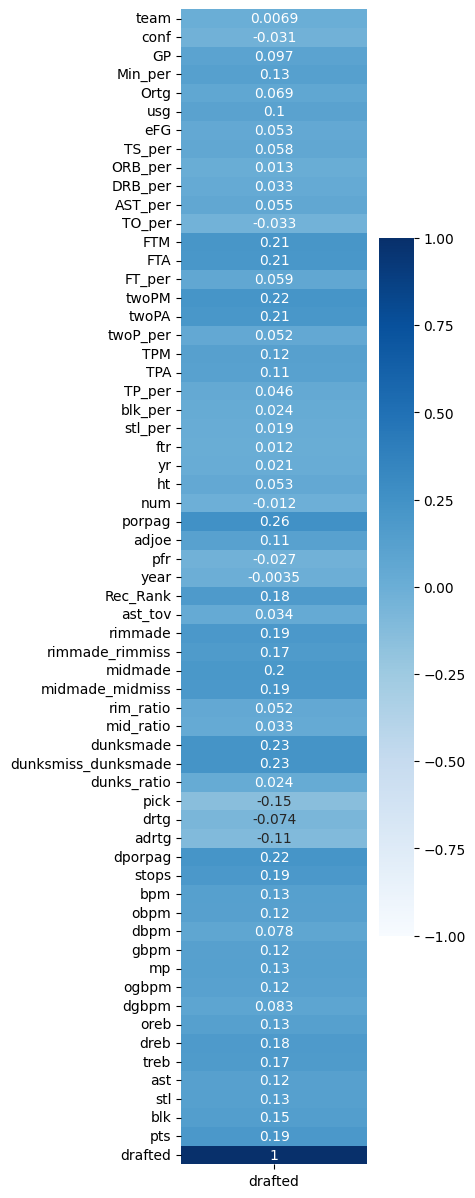

In [91]:
corr = df_train.drop('player_id',axis=1).corr()
plt.figure(figsize=(3, 15))
heatmap = sns.heatmap(corr[['drafted']], vmin=-1, vmax=1, cmap='Blues', annot=True)

In [125]:
selected_features =df_train[corr[(corr['drafted']>=0.1)|(corr['drafted']<=-(0.1))].transpose().columns]
selected_features

,Min_per,usg,FTM,FTA,twoPM,twoPA,TPM,TPA,porpag,adjoe,Rec_Rank,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,dunksmade,dunksmiss_dunksmade,pick,adrtg,dporpag,stops,bpm,obpm,gbpm,mp,ogbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,29.5,16.6,10,14,26,68,13,39,0.258086,89.3938,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,108.5270,0.893017,49.964400,-4.995140,-1.623360,-4.723150,14.5769,-2.781990,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,60.9,14.9,30,45,56,113,20,51,1.334920,100.0660,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,104.0170,1.880030,111.929000,0.593024,1.385490,-0.300196,24.5294,-0.052263,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,72.0,21.8,45,67,67,157,50,154,2.274070,104.1070,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,102.1540,2.763870,115.021000,0.003161,1.024770,0.665065,33.1852,1.548230,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,44.5,16.0,14,27,25,63,28,62,0.552857,93.2086,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,106.5560,1.218710,84.169800,-0.977798,-0.502574,-0.736233,17.9667,-0.342775,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,56.2,22.0,64,114,93,176,0,0,1.060130,97.8554,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,100.7240,1.992790,128.028000,-1.836060,-1.946040,-2.353180,22.9091,-1.684860,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,0.1,48.9,0,0,0,1,0,0,-0.414715,-34.1733,53.456363,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,33.25469,114.0410,0.046150,0.088249,-55.565300,-38.138100,-39.908400,1.0000,-22.468800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
56087,0.2,35.9,2,2,1,1,0,0,0.998677,229.2430,53.456363,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,33.25469,118.0420,0.064534,0.201875,12.155000,22.404000,45.075600,2.0000,35.683300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0
56088,0.6,28.9,2,4,0,0,0,0,-0.685731,57.1100,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,95.4569,0.774465,1.156220,-24.689500,-18.070200,-16.613300,7.0000,-13.372700,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0
56089,0.1,20.0,0,0,0,0,1,1,0.631560,267.3470,53.456363,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.25469,124.5250,0.009770,0.095737,22.796400,29.370100,110.785000,1.0000,94.422600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0


In [126]:
selected_features = selected_features.merge(df_train[categorical_features], left_index=True, right_index=True)
selected_features

,Min_per,usg,FTM,FTA,twoPM,twoPA,TPM,TPA,porpag,adjoe,Rec_Rank,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,dunksmade,dunksmiss_dunksmade,pick,adrtg,dporpag,stops,bpm,obpm,gbpm,mp,ogbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,team,conf,yr,num
0,29.5,16.6,10,14,26,68,13,39,0.258086,89.3938,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,108.5270,0.893017,49.964400,-4.995140,-1.623360,-4.723150,14.5769,-2.781990,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,267,27,2,1.0
1,60.9,14.9,30,45,56,113,20,51,1.334920,100.0660,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,104.0170,1.880030,111.929000,0.593024,1.385490,-0.300196,24.5294,-0.052263,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,327,33,2,1.0
2,72.0,21.8,45,67,67,157,50,154,2.274070,104.1070,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,102.1540,2.763870,115.021000,0.003161,1.024770,0.665065,33.1852,1.548230,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,272,7,3,1.0
3,44.5,16.0,14,27,25,63,28,62,0.552857,93.2086,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,106.5560,1.218710,84.169800,-0.977798,-0.502574,-0.736233,17.9667,-0.342775,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,231,34,3,1.0
4,56.2,22.0,64,114,93,176,0,0,1.060130,97.8554,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,100.7240,1.992790,128.028000,-1.836060,-1.946040,-2.353180,22.9091,-1.684860,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,228,10,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,0.1,48.9,0,0,0,1,0,0,-0.414715,-34.1733,53.456363,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,33.25469,114.0410,0.046150,0.088249,-55.565300,-38.138100,-39.908400,1.0000,-22.468800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,198,17,0,30.0
56087,0.2,35.9,2,2,1,1,0,0,0.998677,229.2430,53.456363,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,33.25469,118.0420,0.064534,0.201875,12.155000,22.404000,45.075600,2.0000,35.683300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0,217,30,2,12.0
56088,0.6,28.9,2,4,0,0,0,0,-0.685731,57.1100,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,95.4569,0.774465,1.156220,-24.689500,-18.070200,-16.613300,7.0000,-13.372700,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0,297,32,0,11.0
56089,0.1,20.0,0,0,0,0,1,1,0.631560,267.3470,53.456363,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.25469,124.5250,0.009770,0.095737,22.796400,29.370100,110.785000,1.0000,94.422600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0,332,29,0,20.0


In [146]:
X_train = selected_features.drop(['drafted','team'], axis=1)
y_train = df_train[['drafted']]

In [147]:
def get_score_values(scores):
    print("Precision Score: " + str(scores['test_precision'].mean()) + " +- " + str(scores['test_precision'].std()))
    print("Recall Score: " + str(scores['test_recall'].mean()) + " +- " + str(scores['test_recall'].std()))
    print("F1 Score: " + str(scores['test_f1'].mean()) + " +- " + str(scores['test_f1'].std()))
    print("AUC score: " + str(scores['test_roc_auc'].mean()) + " +- " + str(scores['test_roc_auc'].std()))


In [148]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import GradientBoostingClassifier
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = GradientBoostingClassifier()
scoring = ['precision', 'recall', 'f1', 'roc_auc']
cross_val = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1))
get_score_values(cross_val)
model.fit(X_train, y_train)
filename = '../models/at1_week2_model/finalized_week2_model.sav'
pickle.dump(model, open(filename, 'wb'))

/home/ronik/.cache/pypoetry/virtualenvs/kaggle-assignments-amWZMVck-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtualenvs/kaggle-assignments-amWZMVck-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtualenvs/kaggle-assignments-amWZMVck-py3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ronik/.cache/pypoetry/virtua

Precision Score: 0.7511463090821552 +- 0.08837857209873463
Recall Score: 0.6788259958071279 +- 0.061747246922443766
F1 Score: 0.7103947521971656 +- 0.056411855626313664
AUC score: 0.9977107799108694 +- 0.0006579882846662927


In [149]:
selected_features_test = selected_features.drop(['drafted','team'], axis=1)
df_test = df_test[selected_features_test.columns]
df_test

,Min_per,usg,FTM,FTA,twoPM,twoPA,TPM,TPA,porpag,adjoe,Rec_Rank,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,dunksmade,dunksmiss_dunksmade,pick,adrtg,dporpag,stops,bpm,obpm,gbpm,mp,ogbpm,oreb,dreb,treb,ast,stl,blk,pts,conf,yr,num
0,3.0,4.7,0,0,0,0,1,3,0.261536,91.80970,53.456363,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.25469,110.8410,0.655018,3.040990,-6.329190,-2.48656,-4.743390,10.0000,-2.467740,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,19,3,25.0
1,17.6,18.6,1,2,2,8,7,28,-1.110000,57.54910,53.456363,2.000000,4.00000,0.000000,4.000000,0.000000,0.000000,33.25469,116.0180,0.450228,21.524200,-11.237600,-7.65745,-11.907200,11.5455,-7.494720,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,19,3,0.0
2,28.6,23.8,14,32,33,59,0,2,0.662985,93.67160,53.456363,26.000000,37.00000,7.000000,22.000000,9.000000,10.000000,33.25469,105.5980,1.706130,48.262400,-0.796603,-3.88882,-1.207060,23.3333,-2.924950,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,2,3,32.0
3,1.3,10.4,0,0,1,2,1,1,0.135373,102.32400,53.456363,0.000000,0.00000,1.000000,2.000000,0.000000,0.000000,33.25469,95.3504,0.253055,2.533010,-1.802590,-1.15052,0.194558,2.2857,-0.767911,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,5,3,32.0
4,78.5,21.5,31,36,62,129,58,147,2.977030,111.42600,92.800000,14.000000,26.00000,48.000000,103.000000,0.000000,0.000000,33.25469,104.3060,2.610670,114.531000,1.064440,2.41992,1.874610,32.7826,2.893610,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,6,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.3,19.3,0,0,0,1,0,0,-0.117667,62.64930,93.600000,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,61.6342,0.341560,1.324650,1.175740,-5.17288,18.161500,1.5000,2.143290,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,7,0,12.0
4966,1.3,7.1,0,0,0,1,0,0,-0.859158,19.23020,53.456363,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,33.25469,124.7220,0.032976,1.432110,-11.362500,-7.44880,-12.236100,3.7500,-7.242230,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,30,0,33.0
4967,0.1,0.0,0,0,0,0,0,0,-0.326039,-8.70362,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,108.0530,0.066632,0.098523,-4.939260,-4.48590,-4.651630,1.0000,-3.524820,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3,0,24.0
4968,0.1,0.0,0,0,0,0,0,0,-0.321884,-7.50633,53.456363,28.066087,47.05249,14.494741,40.523115,3.836553,4.311618,33.25469,107.5350,0.068429,0.100635,-1.144880,-1.48944,-4.256800,1.0000,-1.876040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6,0,30.0


In [150]:
loaded_model = pickle.load(open(filename, 'rb'))
result = pd.DataFrame(loaded_model.predict_proba(df_test))[1]

In [154]:
test_data['drafted'] = result

In [158]:
test_data[['player_id', 'drafted']].to_csv('../models/scores_week_2/scores_week2_draft.csv', index=False)